# Ortonormalizaciòn y construcción de operadores de proyección utilizando Sympy

In [4]:
from sympy import init_printing
init_printing(use_latex=True)
from sympy.physics.quantum import Dagger
from sympy import *
import numpy as np

In [5]:
from sympy.matrices import Matrix
T = [Matrix([4,-3,5]), Matrix([-3,2,1]), Matrix([5,1,-6])]

In [52]:
type(T)

list

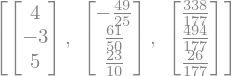

In [6]:
out1 = GramSchmidt(T) #aqui se otogonalizan los vectores
out1

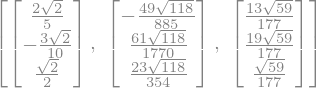

In [30]:
out2 = GramSchmidt(T, True)# aquí los vectores se normalizan
out2

In [10]:
out1[0].dot(out1[1]) # se verifica que el primer y segundo vector son normales, observe que el contador empieza de cero

In [38]:
out2[0].norm()

In [41]:
from sympy import Matrix

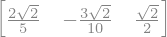

In [43]:
v1ad=out2[0].transpose()
v1ad

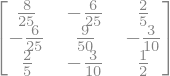

In [44]:
proyector1= out2[0]*out2[0].transpose()
proyector1

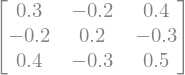

In [51]:
N(proyector1,1)

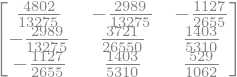

In [50]:
proyector2= out2[1]*out2[1].transpose()
proyector2

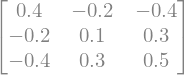

In [48]:
N(proyector2,1)# en caso de que desee ver sus resultados más simples

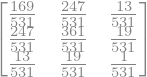

In [46]:
proyector3= out2[2]*out2[2].transpose()
proyector3

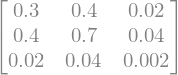

In [49]:
N(proyector3,1)

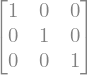

In [47]:
Suma_completa=proyector1+proyector2+proyector3
Suma_completa

### AQUI UN EJEMPLO DE LO QUE NO SE DEBE HACER, TENER CUIDADO AL MOMENTO DE MEZCLAR LIBRERIAS


In [40]:
type(out2)

list

In [39]:
arreglo=np.array(out2)  #Se convierte la lista de vectores en un arreglo
arreglo

array([[[2*sqrt(2)/5],
        [-3*sqrt(2)/10],
        [sqrt(2)/2]],

       [[-49*sqrt(118)/885],
        [61*sqrt(118)/1770],
        [23*sqrt(118)/354]],

       [[13*sqrt(59)/177],
        [19*sqrt(59)/177],
        [sqrt(59)/177]]], dtype=object)

In [13]:
v1, v2, v3 = np.vsplit(arreglo, 3) #aqui se divide el arreglo en 3 vectores columna
print(v1) # se imprime el primer vector para chekear que toda va bien

[[[2*sqrt(2)/5]
  [-3*sqrt(2)/10]
  [sqrt(2)/2]]]


In [14]:
type(v1)

numpy.ndarray

In [34]:
v1fila = np.asmatrix(v1) #se convierte el arreglo en matriz, que es una fila
v1fila


matrix([[2*sqrt(2)/5, -3*sqrt(2)/10, sqrt(2)/2]], dtype=object)

In [16]:
type(v1fila)

numpy.matrix

In [35]:
normav1=np.linalg.norm(v1fila)
normav1

TypeError: loop of ufunc does not support argument 0 of type One which has no callable sqrt method

In [18]:
v1columna=np.transpose(v1fila) #se transpone la fila para conseguir la columna
v1columna

matrix([[2*sqrt(2)/5],
        [-3*sqrt(2)/10],
        [sqrt(2)/2]], dtype=object)

In [19]:
Proyeccion1=v1columna*v1fila
Proyeccion1

matrix([[8/25, -6/25, 2/5],
        [-6/25, 9/50, -3/10],
        [2/5, -3/10, 1/2]], dtype=object)

In [20]:
v2fila = np.asmatrix(v2) #se convierte el arreglo en matriz, que es una fila
v2fila

matrix([[-49*sqrt(118)/885, 61*sqrt(118)/1770, 23*sqrt(118)/354]],
       dtype=object)

In [21]:
v2columna=np.transpose(v2fila) #se transpone la fila para conseguir la columna
v2columna

matrix([[-49*sqrt(118)/885],
        [61*sqrt(118)/1770],
        [23*sqrt(118)/354]], dtype=object)

In [22]:
Proyeccion2=v2columna*v2fila
Proyeccion2

matrix([[4802/13275, -2989/13275, -1127/2655],
        [-2989/13275, 3721/26550, 1403/5310],
        [-1127/2655, 1403/5310, 529/1062]], dtype=object)

In [25]:
v3fila = np.asmatrix(v3) #se convierte el arreglo en matriz, que es una fila
v3fila

matrix([[13*sqrt(59)/177, 19*sqrt(59)/177, sqrt(59)/177]], dtype=object)

In [26]:
v3columna=np.transpose(v3fila) #se transpone la fila para conseguir la columna
v3columna

matrix([[13*sqrt(59)/177],
        [19*sqrt(59)/177],
        [sqrt(59)/177]], dtype=object)

In [27]:
Proyeccion3=v3columna*v2fila
Proyeccion3

matrix([[-637*sqrt(2)/2655, 793*sqrt(2)/5310, 299*sqrt(2)/1062],
        [-931*sqrt(2)/2655, 1159*sqrt(2)/5310, 437*sqrt(2)/1062],
        [-49*sqrt(2)/2655, 61*sqrt(2)/5310, 23*sqrt(2)/1062]],
       dtype=object)

In [28]:
Pt=Proyeccion1+Proyeccion2+Proyeccion3
Pt

matrix([[362/531 - 637*sqrt(2)/2655, -247/531 + 793*sqrt(2)/5310,
         -13/531 + 299*sqrt(2)/1062],
        [-931*sqrt(2)/2655 - 247/531, 1159*sqrt(2)/5310 + 170/531,
         -19/531 + 437*sqrt(2)/1062],
        [-49*sqrt(2)/2655 - 13/531, -19/531 + 61*sqrt(2)/5310,
         23*sqrt(2)/1062 + 530/531]], dtype=object)